In [80]:
# Loading the necessary libraries
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)


person_age : Âge de la personne  
person_gender : Genre de la personne  
person_education : Niveau d'éducation le plus élevé  
person_income : Revenu annuel  
person_emp_exp : Années d'expérience professionnelle  
person_home_ownership : Statut de propriété du logement (ex. : location, propriétaire, hypothèque)  
loan_amnt : Montant du prêt demandé  
loan_intent : Objet du prêt  
loan_int_rate : Taux d'intérêt du prêt  
loan_percent_income : Montant du prêt en pourcentage du revenu annuel  
cb_person_cred_hist_length : Durée de l'historique de crédit en années  
credit_score : Score de crédit de la personne  
previous_loan_defaults_on_file : Indicateur de défauts de paiement sur des prêts précédents  
loan_status : Statut d'approbation du prêt (1 = approuvé ; 0 = refusé)  


In [81]:
data <- read.csv("loan_data.csv")
data$loan_percent_income <- NULL
data$person_age <- NULL
head(data)
summary(data)

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>
1,female,Master,71948,0,RENT,35000,PERSONAL,16.02,3,561,No,1
2,female,High School,12282,0,OWN,1000,EDUCATION,11.14,2,504,Yes,0
3,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,3,635,No,1
4,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,2,675,No,1
5,male,Master,66135,1,RENT,35000,MEDICAL,14.27,4,586,No,1
6,female,High School,12951,0,OWN,2500,VENTURE,7.14,2,532,No,1


 person_gender      person_education   person_income     person_emp_exp  
 Length:45000       Length:45000       Min.   :   8000   Min.   :  0.00  
 Class :character   Class :character   1st Qu.:  47204   1st Qu.:  1.00  
 Mode  :character   Mode  :character   Median :  67048   Median :  4.00  
                                       Mean   :  80319   Mean   :  5.41  
                                       3rd Qu.:  95789   3rd Qu.:  8.00  
                                       Max.   :7200766   Max.   :125.00  
 person_home_ownership   loan_amnt     loan_intent        loan_int_rate  
 Length:45000          Min.   :  500   Length:45000       Min.   : 5.42  
 Class :character      1st Qu.: 5000   Class :character   1st Qu.: 8.59  
 Mode  :character      Median : 8000   Mode  :character   Median :11.01  
                       Mean   : 9583                      Mean   :11.01  
                       3rd Qu.:12237                      3rd Qu.:12.99  
                       Max.   :35000  

In [82]:
data[, "person_gender"] <- as.factor(data[, "person_gender"])
data[, "person_education"] <- as.factor(data[, "person_education"])
data[, "person_home_ownership"] <- as.factor(data[, "person_home_ownership"])
data[, "loan_intent"] <- as.factor(data[, "loan_intent"])
data[, "previous_loan_defaults_on_file"] <- as.factor(data[, "previous_loan_defaults_on_file"])
data[, "loan_status"] <- as.factor(data[, "loan_status"])

In [83]:
sum(is.na(data))  # Đếm tổng số giá trị NA trong toàn bộ dataframe


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 0

In [84]:
sum(subset(data, person_age < person_emp_exp))
head(subset(data, person_emp_exp >100))

ERROR: Error in eval(e, x, parent.frame()): object 'person_age' not found


In [ ]:
g3<-ggplot(data,aes(x=person_age))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(data,aes(x=loan_amnt))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(data,aes(x=loan_int_rate))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(data,aes(x=cb_person_cred_hist_length))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(data,aes(x=credit_score))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 

grid.arrange(g3,g5,g6,g7,g8,ncol=3)
rm(g3,g5,g6,g7,g8)

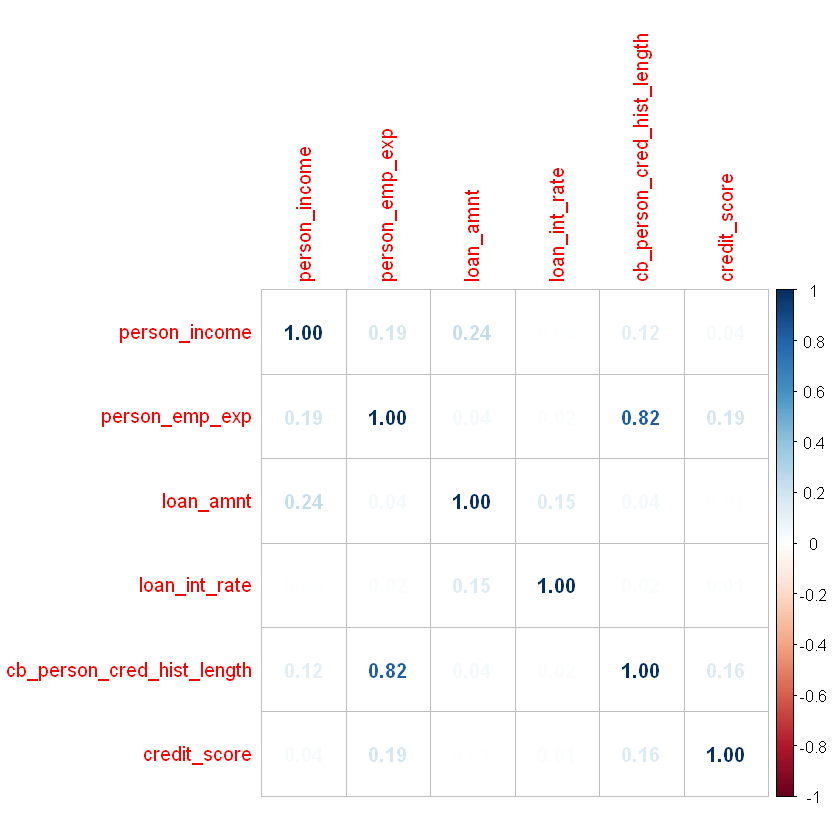

In [85]:
library(corrplot)

corrplot(cor(data[,c(3,4,6,8,9,10)]),method="number")


In [104]:
library(FactoMineR)
library(factoextra)
library(corrplot)
library(ggplot2)
library(reshape2)
library(gridExtra)

acp <- PCA(data[,c(3,4,6,8,9,10)], scale.unit = TRUE,
           graph = FALSE, ncp = 6)

fviz_eig(acp, addlabels = TRUE, ylim = c(0, 50))



ERROR: Error in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]): there is no package called 'car'


In [3]:

install.packages("pbkrtest", dependencies = TRUE)






Warning message:
"package 'pbkrtest' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
